In [240]:
# Q1 - 1/3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

In [241]:
# Q1 2/3
tbData = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [242]:
# Q1 3/3
print("----Shape----")
print(tbData.shape)
print("----Info-----")
print(tbData.info())
print("----Describe-----")
print(tbData.describe())
print("----isNull-------")
print(tbData.isnull().values.any())
print("-----First 50 entries------")
print(tbData.head(25))
print("-----Incorrect Imputation----")
print("There are roughly 52 individual who has negative experience. This can be example of incorrect imputation")
print(tbData[tbData["Experience"] < 0].count())
print("There is one zip code that is less than 9999")
print(tbData[tbData["ZIP Code"] < 9999].count())

----Shape----
(5000, 14)
----Info-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
----Describe

In [243]:
#Q2 1/x Unique Values in each column
print("----Unique Values----")
for (cName, cData) in tbData.iteritems():
    print(cName, cData.nunique())

----Unique Values----
ID 5000
Age 45
Experience 47
Income 162
ZIP Code 467
Family 4
CCAvg 108
Education 3
Mortgage 347
Personal Loan 2
Securities Account 2
CD Account 2
Online 2
CreditCard 2


In [244]:
# Q2 2/x Number of people with zero mortgage
print ("--- People with zero mortgage ---")
tbData[tbData['Mortgage'] == 0].count()

--- People with zero mortgage ---


ID                    3462
Age                   3462
Experience            3462
Income                3462
ZIP Code              3462
Family                3462
CCAvg                 3462
Education             3462
Mortgage              3462
Personal Loan         3462
Securities Account    3462
CD Account            3462
Online                3462
CreditCard            3462
dtype: int64

In [245]:
# Q2 3/x Number of people with zero average credit card spending
print ("--- People with zero mortgage ---")
tbData[tbData['CCAvg'] == 0].count()

--- People with zero mortgage ---


ID                    106
Age                   106
Experience            106
Income                106
ZIP Code              106
Family                106
CCAvg                 106
Education             106
Mortgage              106
Personal Loan         106
Securities Account    106
CD Account            106
Online                106
CreditCard            106
dtype: int64

In [246]:
# Q2 4/x value counts of all categorical columns.
print("---- Age Value Counts ----")
tbData['Age'].value_counts()

---- Age Value Counts ----


35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

In [247]:
#Q2
for i in list(tbData.columns):
    print(tbData[i].value_counts())
    print()

2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12

In [248]:
#Q2
tbData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


(array([ 12.,  28.,  53.,  78.,  91., 103., 123., 136.,   0., 125., 120.,
        120., 134., 151., 107., 106.,   0., 115., 133., 125., 136., 126.,
        149., 121.,   0., 127., 127., 113., 118., 115., 138., 129., 145.,
          0., 112., 143., 125., 135., 132., 143., 132.,   0., 127., 122.,
        123., 108.,  78.,  80.,  24.,  12.]),
 array([23.  , 23.88, 24.76, 25.64, 26.52, 27.4 , 28.28, 29.16, 30.04,
        30.92, 31.8 , 32.68, 33.56, 34.44, 35.32, 36.2 , 37.08, 37.96,
        38.84, 39.72, 40.6 , 41.48, 42.36, 43.24, 44.12, 45.  , 45.88,
        46.76, 47.64, 48.52, 49.4 , 50.28, 51.16, 52.04, 52.92, 53.8 ,
        54.68, 55.56, 56.44, 57.32, 58.2 , 59.08, 59.96, 60.84, 61.72,
        62.6 , 63.48, 64.36, 65.24, 66.12, 67.  ]),
 <a list of 50 Patch objects>)

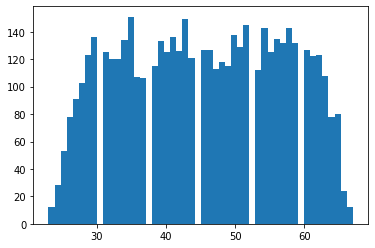

In [249]:
#Q2
plt.hist(tbData['Age'], bins=50)

(array([  4.,  15.,  33.,  66.,  74.,  85., 129., 113., 146., 119., 121.,
        119.,   0., 147., 118., 116., 102., 117., 127., 119., 127., 125.,
        137., 135.,   0., 148., 113., 124., 144., 131., 142., 134., 125.,
        138., 124., 126., 104.,   0., 154., 117., 125., 143., 114., 116.,
         88.,  85.,  57.,  43.,   8.,   3.]),
 array([-3.  , -2.08, -1.16, -0.24,  0.68,  1.6 ,  2.52,  3.44,  4.36,
         5.28,  6.2 ,  7.12,  8.04,  8.96,  9.88, 10.8 , 11.72, 12.64,
        13.56, 14.48, 15.4 , 16.32, 17.24, 18.16, 19.08, 20.  , 20.92,
        21.84, 22.76, 23.68, 24.6 , 25.52, 26.44, 27.36, 28.28, 29.2 ,
        30.12, 31.04, 31.96, 32.88, 33.8 , 34.72, 35.64, 36.56, 37.48,
        38.4 , 39.32, 40.24, 41.16, 42.08, 43.  ]),
 <a list of 50 Patch objects>)

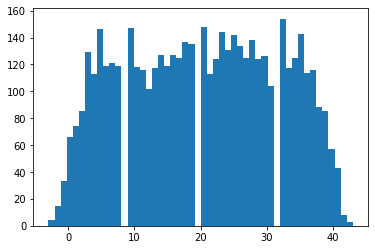

In [250]:
#Q2
plt.hist(tbData['Experience'], bins=50)

(array([129.,  96., 152., 295., 130., 227., 202., 318., 224., 182., 217.,
        108., 270.,  95., 177., 136., 253., 263.,  98., 129.,  53.,  92.,
         40.,  75., 117.,  54.,  74.,  47.,  94.,  38.,  77.,  54.,  42.,
         51.,  44.,  47.,  24.,  47.,  34.,  45.,  54.,  12.,  36.,  26.,
         13.,   7.,   0.,   0.,   1.,   1.]),
 array([  8.  ,  12.32,  16.64,  20.96,  25.28,  29.6 ,  33.92,  38.24,
         42.56,  46.88,  51.2 ,  55.52,  59.84,  64.16,  68.48,  72.8 ,
         77.12,  81.44,  85.76,  90.08,  94.4 ,  98.72, 103.04, 107.36,
        111.68, 116.  , 120.32, 124.64, 128.96, 133.28, 137.6 , 141.92,
        146.24, 150.56, 154.88, 159.2 , 163.52, 167.84, 172.16, 176.48,
        180.8 , 185.12, 189.44, 193.76, 198.08, 202.4 , 206.72, 211.04,
        215.36, 219.68, 224.  ]),
 <a list of 50 Patch objects>)

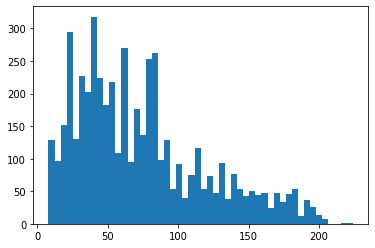

In [251]:
#Q2
plt.hist(tbData['Income'], bins=50)

(array([1472.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1296.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 1010.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 1222.]),
 array([1.  , 1.06, 1.12, 1.18, 1.24, 1.3 , 1.36, 1.42, 1.48, 1.54, 1.6 ,
        1.66, 1.72, 1.78, 1.84, 1.9 , 1.96, 2.02, 2.08, 2.14, 2.2 , 2.26,
        2.32, 2.38, 2.44, 2.5 , 2.56, 2.62, 2.68, 2.74, 2.8 , 2.86, 2.92,
        2.98, 3.04, 3.1 , 3.16, 3.22, 3.28, 3.34, 3.4 , 3.46, 3.52, 3.58,
        3.64, 3.7 , 3.76, 3.82, 3.88, 3.94, 4.  ]),
 <a list of 50 Patch objects>)

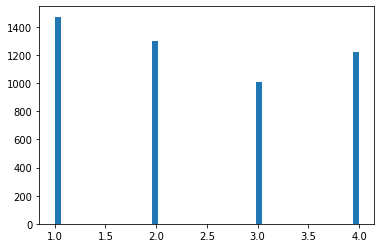

In [252]:
#Q2
plt.hist(tbData['Family'], bins=50)

(array([289., 445., 460., 196., 293., 381., 273., 178., 286., 258., 288.,
        298., 107., 292.,  54.,  73., 108.,  15.,  96.,  27.,  55.,  48.,
         60.,  34.,  22.,  24.,  21.,  29.,  18.,   5.,  40.,  25.,  25.,
         28.,  14.,  14.,  23.,  34.,   9.,   4.,  23.,   2.,   2.,   8.,
         10.,   2.,   1.,   0.,   0.,   3.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <a list of 50 Patch objects>)

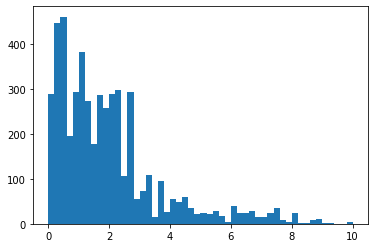

In [253]:
#Q2
plt.hist(tbData['CCAvg'], bins=50)
#Seems like many customers have less than $3500 per month

(array([3.462e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+01,
        1.280e+02, 1.480e+02, 1.450e+02, 1.250e+02, 9.900e+01, 1.010e+02,
        9.100e+01, 6.600e+01, 7.100e+01, 5.400e+01, 5.100e+01, 5.900e+01,
        5.000e+01, 4.000e+01, 2.800e+01, 2.500e+01, 1.900e+01, 2.700e+01,
        2.800e+01, 2.500e+01, 1.400e+01, 1.100e+01, 1.500e+01, 8.000e+00,
        8.000e+00, 1.400e+01, 7.000e+00, 1.100e+01, 6.000e+00, 6.000e+00,
        5.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00]),
 array([  0. ,  12.7,  25.4,  38.1,  50.8,  63.5,  76.2,  88.9, 101.6,
        114.3, 127. , 139.7, 152.4, 165.1, 177.8, 190.5, 203.2, 215.9,
        228.6, 241.3, 254. , 266.7, 279.4, 292.1, 304.8, 317.5, 330.2,
        342.9, 355.6, 368.3, 381. , 393.7, 406.4, 419.1, 431.8, 444.5,
        457.2, 469.9, 482.6, 495.3, 508. , 520.7, 533.4, 546.1, 558.8,
        571.5, 584.2,

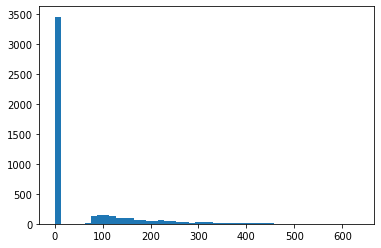

In [254]:
#Q2
plt.hist(tbData['Mortgage'], bins=50)
#Seems like many don't have mortgages

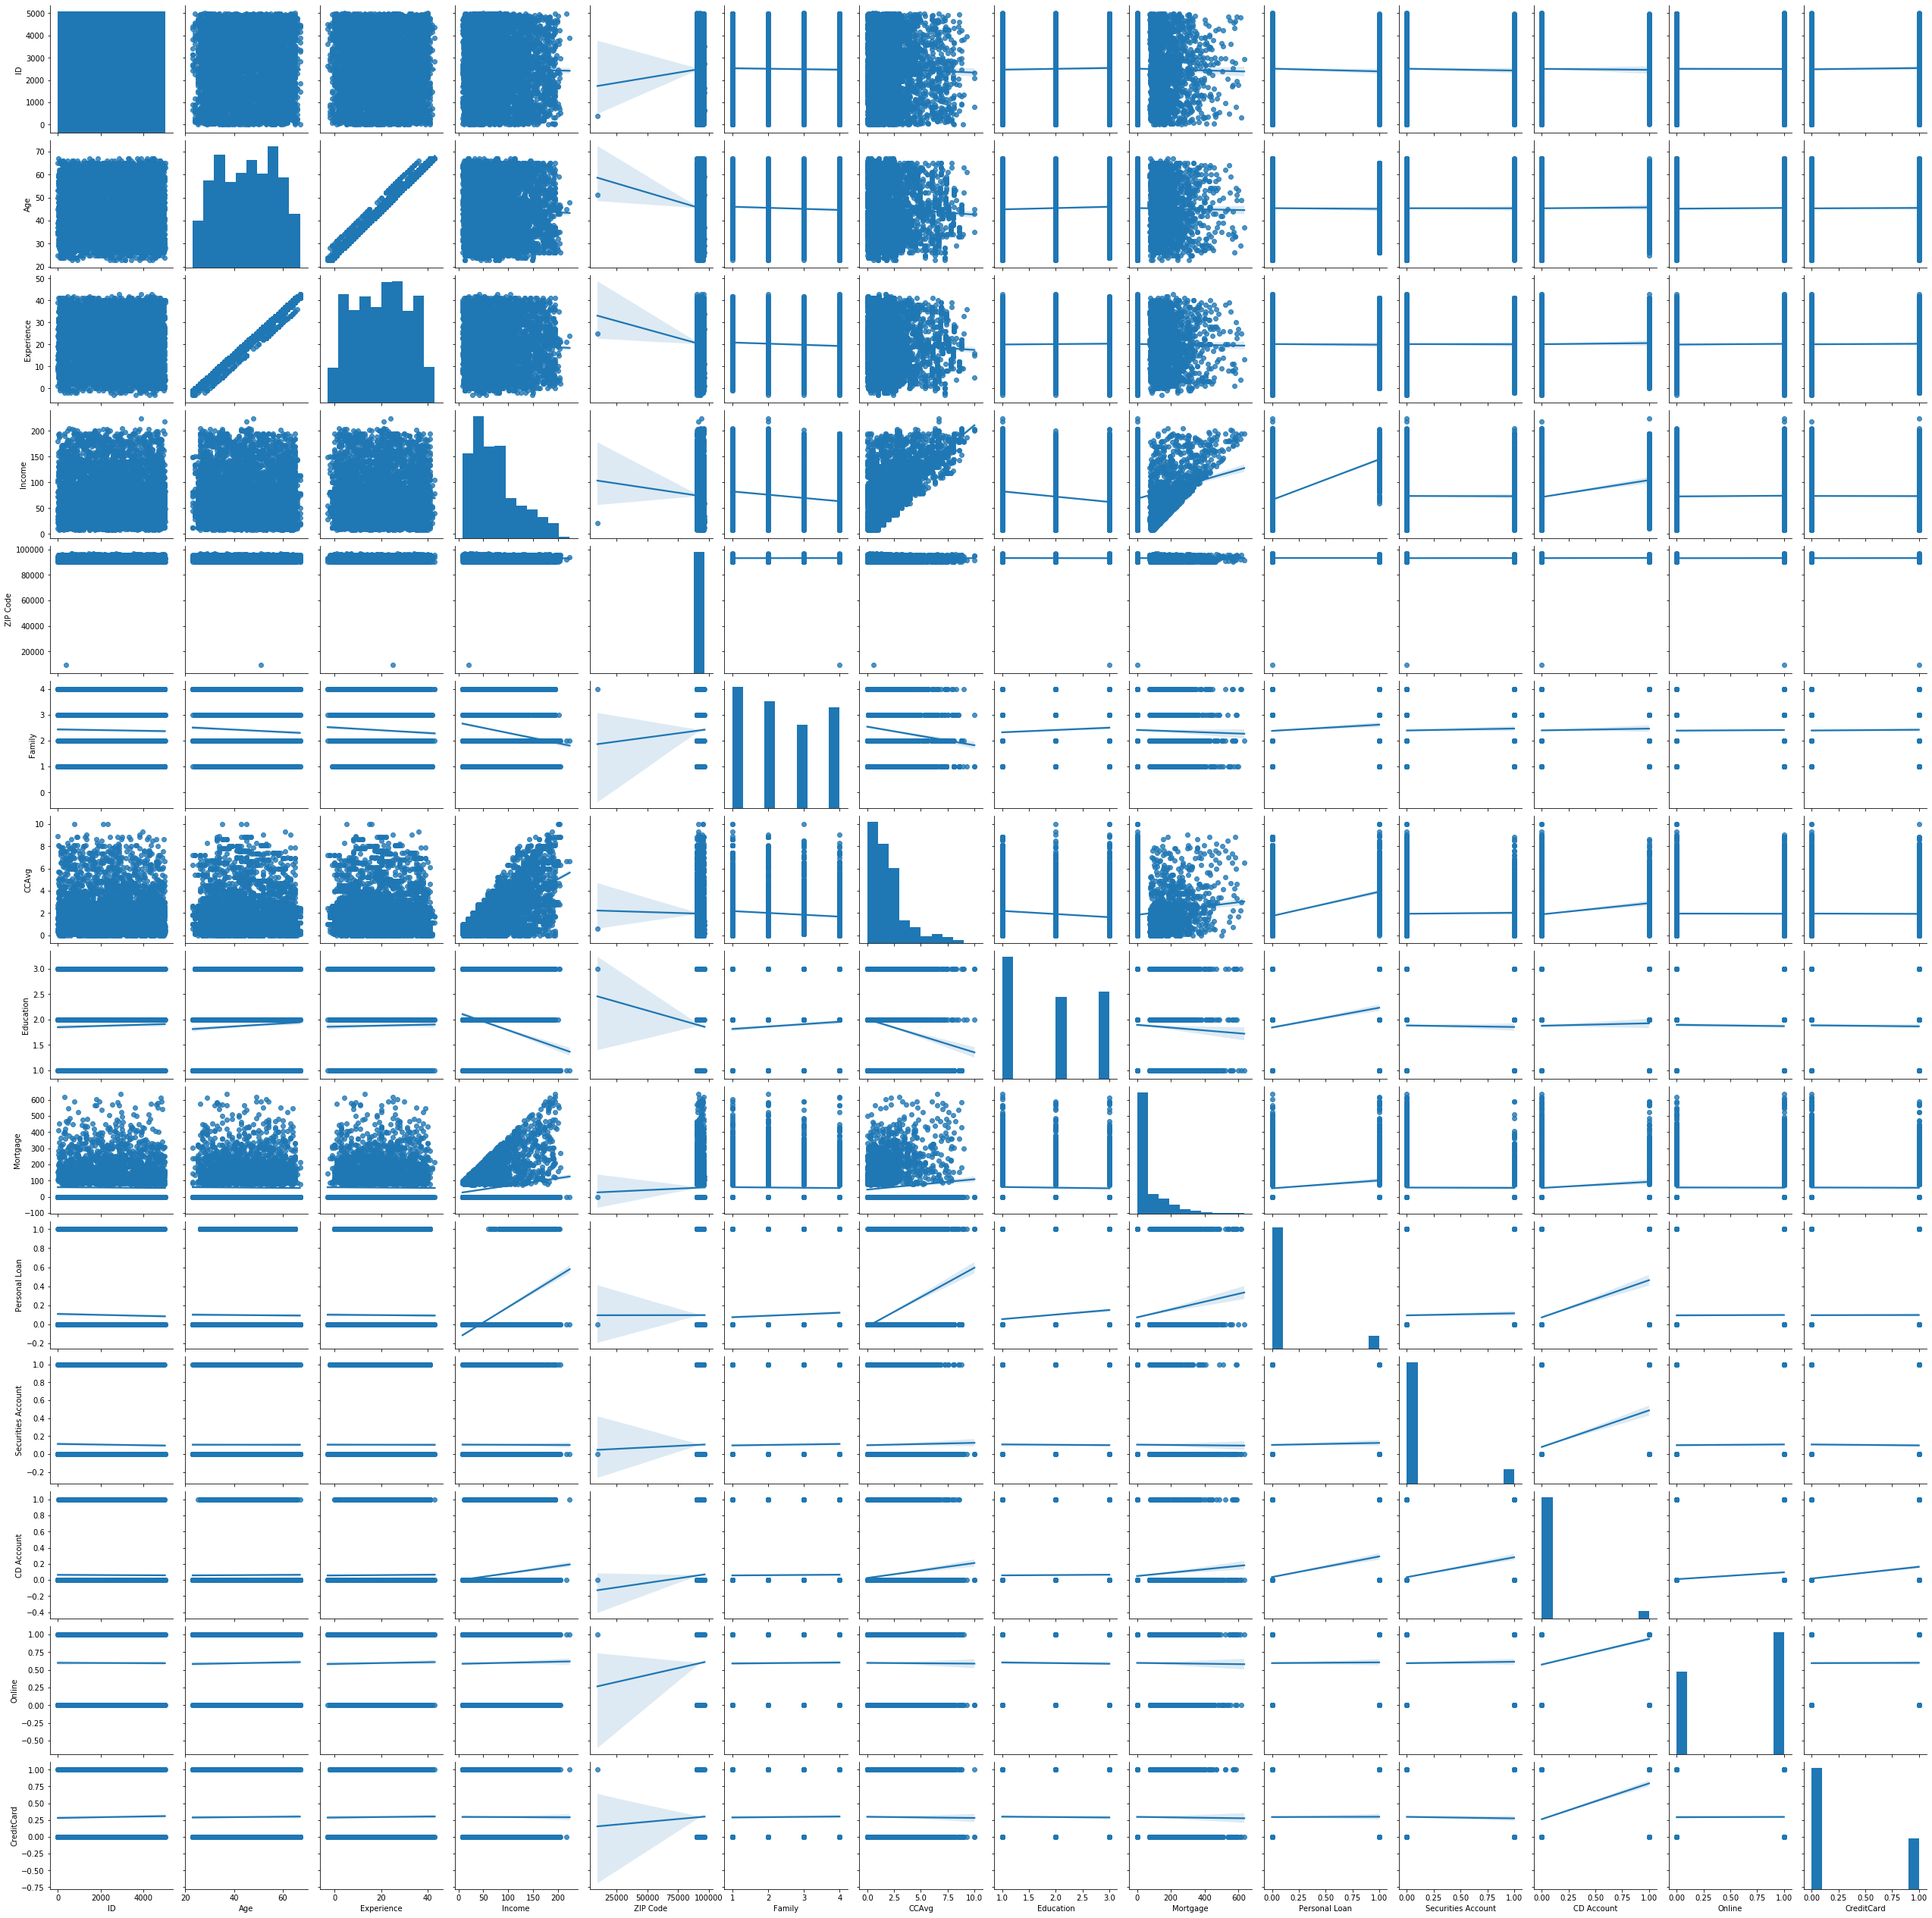

In [255]:
#Q2
sns.pairplot(tbData, kind="reg")

In [256]:
#Q2
tbData.corr()
#Personal Loan seems to be highly correlated to Income, CCAvg, CDAccount

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.00,-0.01,-0.01,-0.02,0.01,-0.02,-0.02,0.02,-0.01,-0.02,-0.02,-0.01,-0.00,0.02
Age,-0.01,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,-0.01,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.02,-0.06,-0.05,1.00,-0.02,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP Code,0.01,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,0.02,0.01
Family,-0.02,-0.05,-0.05,-0.16,0.01,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.02,-0.05,-0.05,0.65,-0.00,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.02,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.02,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00


In [257]:
tbData[tbData["Experience"] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [258]:
tbData["Experience"].describe()

count   5000.00
mean      20.10
std       11.47
min       -3.00
25%       10.00
50%       20.00
75%       30.00
max       43.00
Name: Experience, dtype: float64

In [259]:
#Q2
#Negative Experince value may not be correct. Since most of those who has negative expereince is less than 30,
#modifying hte experience to 0.
tbData.loc[tbData['Experience'] < 0, 'Experience'] = 0

In [260]:
#Q2
tbData.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [261]:
#Q2: drop the ID from the data frame as they are all unique
tbData.drop("ID",axis=1,inplace=True)

In [262]:
tbData[tbData['ZIP Code'] < 9999]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25,21,9307,4,0.60,3,0,0,0,0,1,1


In [263]:
#Q2
#Assign zip code that is less than 9307 to 94720 where are the most customers are located.
tbData.loc[tbData['ZIP Code'] < 9999, 'ZIP Code'] = 94720

In [267]:
tbData.groupby(["Personal Loan"]).mean()
# Looking at this, it seems that higher income, higher CCAvg, higher Education, higher mortgage and higher CD Account 
# seems related to requesting more on Personal Loan.

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.37,20.15,66.24,93171.33,2.37,1.73,1.84,51.79,0.10,0.04,0.60,0.29
1,45.07,19.84,144.75,93153.20,2.61,3.91,2.23,100.85,0.12,0.29,0.61,0.30


In [268]:
#Q3 
Y = tbData['Personal Loan']
X = tbData.drop('Personal Loan', axis=1)

In [269]:
#Q3
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [270]:
#Q4 Using Logistic Regression from Sklearn
model = LogisticRegression(random_state=42,penalty='l1', C = 0.1,solver="liblinear")
model.fit(x_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [271]:
print(model.coef_)
print(model.intercept_)

[[-8.80847910e-02  9.08846075e-02  4.85173603e-02 -1.10217018e-04
   6.14182556e-01  1.37769363e-01  1.47670830e+00  7.41897833e-04
   0.00000000e+00  1.78359316e+00 -7.63173665e-02 -2.17803064e-01]]
[0.]


In [272]:
model.score(x_test, y_test)

0.9446666666666667

In [273]:
model.score(x_train, y_train)

0.95

In [274]:
y_predict = model.predict(x_test)

In [275]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.95

Testing accuracy 0.9446666666666667

Confusion Matrix


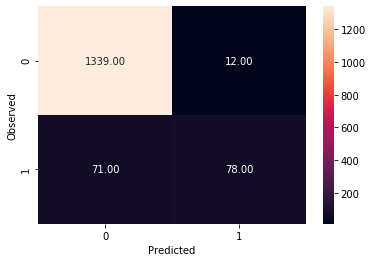

None

Recall: 0.5234899328859061

Precision: 0.8666666666666667

F1 Score: 0.6527196652719667

Roc Auc Score: 0.757303811742731


In [276]:
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [277]:
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict))
print()
print("RMSE:",mean_squared_error(y_test,y_predict)**0.5)
print()
print("R2 Squarred:",r2_score(y_test, y_predict))

Mean Absolute Error: 0.05533333333333333

RMSE: 0.23523038352503134

R2 Squarred: 0.3815170467811565


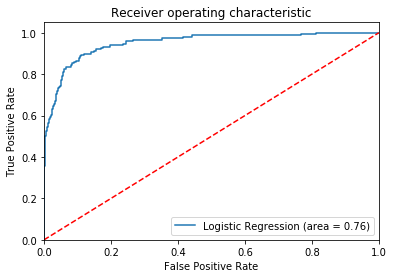

In [278]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [279]:
# Q5
# Running a loop to check different values of 'solver'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

/Users/bhavinshah/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/bhavinshah/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/bhavinshah/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/bhavinshah/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/bhavinshah/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.95, 0.909, 0.911, 0.905, 0.905]

[0.947, 0.908, 0.907, 0.901, 0.901]


/Users/bhavinshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/bhavinshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [280]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.951, 0.905]

[0.948, 0.901]


/Users/bhavinshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [281]:
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

/Users/bhavinshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/bhavinshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/bhavinshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/bhavinshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/bhavinshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblin

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.881, 0.899, 0.895, 0.897, 0.897, 0.897]

[0.879, 0.899, 0.894, 0.89, 0.891, 0.891]


/Users/bhavinshah/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [282]:
# C value of 0.1 seems to yielf best result though 0.5 is also very close.

In [283]:
# Q5 : 
# From above calculations, we can tell that model based on solver newton-cg has the highest model 
# score with penalty 12. Also, the score is looking good for for linlinear solver and penalty of 11.
# We should use either use liblinear (11) or newton-cg(12).

In [284]:
#Q4 :
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(x_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.124418
         Iterations 9


In [285]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [286]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD Account,3.88,48.23,0.98,0.00
Education,1.73,5.66,0.85,0.00
Family,0.73,2.07,0.67,0.00
CCAvg,0.17,1.19,0.54,0.00
Income,0.05,1.06,0.51,0.00
Online,-0.64,0.53,0.35,0.00
CreditCard,-1.18,0.31,0.23,0.00
Securities Account,-1.20,0.30,0.23,0.00
const,-13.58,0.00,0.00,0.01


In [287]:
# Q6 :
# True Positive (observed=1,predicted=1):
# Predicted the personal loan is accepted and personal loan is taken

# False Positive (observed=0,predicted=1):
# Predicted the Personal loan is accepted but customer didn't took the loan.

# True Negative (observed=0,predicted=0):
# Predicted the personal loan will not be taken and customer didn't took the loan.

# False Negative (observed=1,predicted=0):
# Predicted the personal loan will not be taken and cusotmer took the loan.

# Since the bank wants to have more people sign up for the loan, it will be good to have smaller false negative. 
# Accuracy would have been a good matrix. In this case, it is 0.95 which is fairly good. 
# Train accuracy and Test accuracy is very close so it is neither over fit or under fit which is also good.
# The person with the CD account has 98% probability of not getting a loan.